In [485]:
import pandas as pd
import numpy as np
from help import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [486]:
toys = pd.read_csv('amazon_co-ecommerce_sample.csv')

In [487]:
toys.describe()

,number_of_answered_questions
count,9235.000000
mean,1.834976
std,2.517268
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,39.000000


In [488]:
toys.describe(include = ['O'])

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
count,10000,10000,9993,8565,7500,9982,9982,9310,8938,9349,9942,9349,6935,914,9979,6918
unique,10000,9964,2651,2625,89,194,19,255,8755,8514,9939,8514,6749,910,9901,6581
top,d43fadaf5463bbb6017747a3f48a8640,Zoo Animal Hand Sock Glove Finger Puppets Sack...,LEGO,£9.99,2 new,1,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Scalextric | http://ww...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Scalextric | http://ww...,Are these the newest cards out? // HelloYes th...,Five Stars // 5.0 // 1 Feb. 2015 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
freq,1,3,171,189,1337,4315,5140,880,60,113,2,113,38,2,5,27


In [489]:
toys['manufacturer'].value_counts().iloc[0:20]

LEGO                             171
Disney                           167
Oxford Diecast                   156
Playmobil                        147
Star Wars                        120
Mattel                           114
Hasbro                           110
The Puppet Company               109
MyTinyWorld                       93
Corgi                             90
Hornby                            87
Scalextric                        76
Pokémon                           69
Schleich                          68
Amscan                            65
Every-occasion-party-supplies     62
Melissa & Doug                    59
FunKo                             59
Papo                              58
Tamiya                            57
Name: manufacturer, dtype: int64

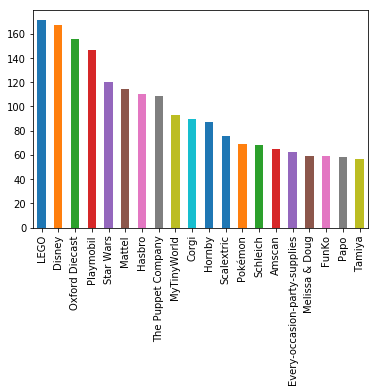

In [490]:
toys['manufacturer'].value_counts().iloc[0:20].plot.bar()

In [491]:
toys['price'].head(10)

0      £3.42
1     £16.99
2      £9.99
3     £39.99
4     £32.19
5      £6.99
6     £24.99
7     £69.93
8    £235.58
9        NaN
Name: price, dtype: object

In [492]:
toys['price'].str.replace(r'[^\d.]','').head(10)

0      3.42
1     16.99
2      9.99
3     39.99
4     32.19
5      6.99
6     24.99
7     69.93
8    235.58
9       NaN
Name: price, dtype: object

In [493]:
toys['price'] = toys['price'].str.replace(r'[^\d.]','')

In [494]:
toys['price'].loc[toys['price'].str.len() == 13]

3193    12.6016268.00
Name: price, dtype: object

In [495]:
toys['price'] = toys['price'].str.replace(r'[^\d.]','').str.split('.').str[0]

In [496]:
toys['price'].loc[toys['price'].str.len() == 13]

Series([], Name: price, dtype: object)

In [497]:
toys['price'] = toys['price'].str.replace(r'[^\d.]','').str.split('.').str[0].astype('float')

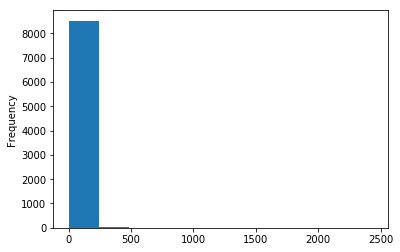

In [498]:
toys['price'].plot.hist()

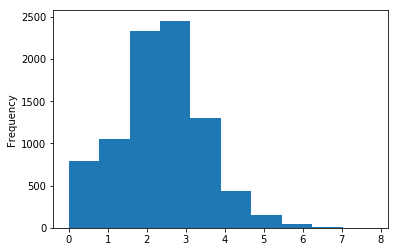

In [499]:
np.log1p(toys['price']).plot.hist()

In [500]:
toys['number_available_in_stock'].str.split(r'[\s]').str[-1].value_counts()

new            7324
used            161
collectible      13
refurbished       2
Name: number_available_in_stock, dtype: int64

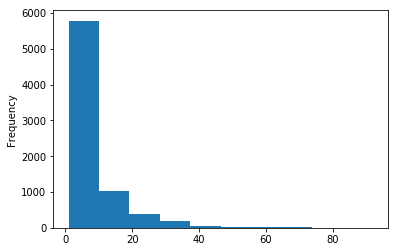

In [501]:
toys['number_available_in_stock'] = toys['number_available_in_stock'].str.split(r'[\s]').str[0].astype('float')
toys['number_available_in_stock'].plot.hist()

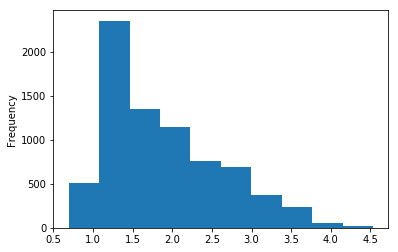

In [502]:
np.log1p(toys['number_available_in_stock']).plot.hist()

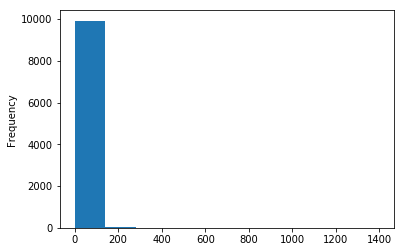

In [503]:
toys['number_of_reviews'] = toys['number_of_reviews'].str.replace(',','').astype('float')
toys['number_of_reviews'].plot.hist()

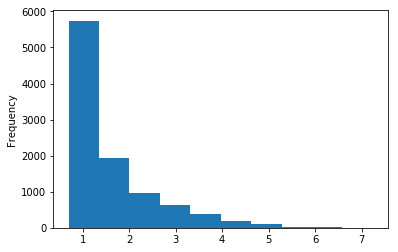

In [504]:
np.log1p(toys['number_of_reviews']).plot.hist()

In [505]:
toys['average_review_rating'].sample(10)

6437    5.0 out of 5 stars
1711    5.0 out of 5 stars
4952    4.0 out of 5 stars
2023    5.0 out of 5 stars
2309    5.0 out of 5 stars
8308    4.9 out of 5 stars
9166    4.1 out of 5 stars
7470    4.1 out of 5 stars
299     4.5 out of 5 stars
4212    5.0 out of 5 stars
Name: average_review_rating, dtype: object

In [506]:
toys['average_review_rating'] = toys['average_review_rating'].str.split(' ').str[0].astype('float') / toys['average_review_rating'].str.split(' ').str[3].astype('float')

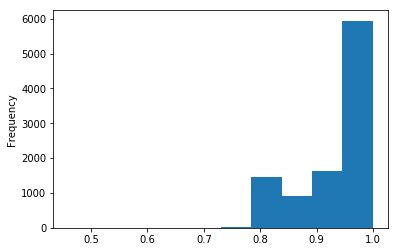

In [507]:
toys['average_review_rating'].plot.hist()

In [508]:
toys['amazon_category_and_sub_category'].sample(10)

7739    Die-Cast & Toy Vehicles > Toy Trains & Accesso...
6864                         Characters & Brands > Hasbro
9890                            Games > Dice & Dice Games
2339    Hobbies > Remote Controlled Devices > Parts & ...
917     Die-Cast & Toy Vehicles > Toy Vehicles & Acces...
9728    Arts & Crafts > Children's Craft Kits > Bead A...
9540                          Games > Trivia & Quiz Games
6166               Figures & Playsets > Cowboys & Indians
3637                Hobbies > Model Building Kits > Tanks
1855        Fancy Dress > Accessories > Temporary Tattoos
Name: amazon_category_and_sub_category, dtype: object

In [509]:
toys['amazon_category_and_sub_category'].str.split(' > ').head(10)

0    [Hobbies, Model Trains & Railway Sets, Rail Ve...
1    [Hobbies, Model Trains & Railway Sets, Rail Ve...
2    [Hobbies, Model Trains & Railway Sets, Rail Ve...
3    [Hobbies, Model Trains & Railway Sets, Rail Ve...
4    [Hobbies, Model Trains & Railway Sets, Rail Ve...
5    [Hobbies, Model Trains & Railway Sets, Lightin...
6    [Hobbies, Model Trains & Railway Sets, Rail Ve...
7    [Hobbies, Model Trains & Railway Sets, Rail Ve...
8    [Hobbies, Model Trains & Railway Sets, Rail Ve...
9    [Hobbies, Model Trains & Railway Sets, Rail Ve...
Name: amazon_category_and_sub_category, dtype: object

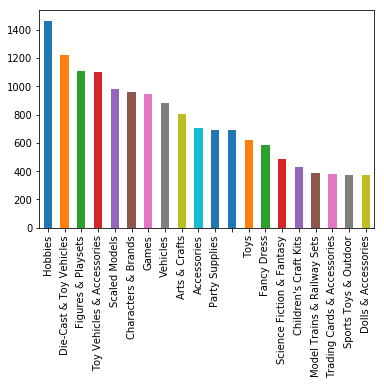

In [510]:
from itertools import chain
from collections import Counter

counts = pd.Series(dict(Counter(chain.from_iterable(toys['amazon_category_and_sub_category'].fillna('').str.split(' > ').values))))
counts = counts.sort_values(ascending = False)
counts.iloc[0:20].plot.bar()

In [511]:
toys['description'] = toys['description'].fillna('')

In [512]:
from sklearn.feature_extraction.text import TfidfVectorizer

counter = TfidfVectorizer(stop_words = 'english')

counter.fit(toys['description'])

product_description = counter.transform(toys['description'])

In [513]:
from sklearn.decomposition import LatentDirichletAllocation

topics = LatentDirichletAllocation(n_components = 20)

topics.fit(product_description)

topics_lda = topics.transform(product_description)

print(topics_lda[0:5])

C:\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


[[0.0169058  0.0169058  0.0169058  0.0169058  0.0169058  0.0169058
  0.0169058  0.0169058  0.0169058  0.12798693 0.0169058  0.0169058
  0.0169058  0.0169058  0.0169058  0.0169058  0.0169058  0.0169058
  0.0169058  0.5677087 ]
 [0.01013908 0.01013908 0.01013908 0.01013908 0.01013908 0.01013908
  0.01013908 0.01013908 0.22129008 0.01013908 0.01013908 0.01013908
  0.01013908 0.01013908 0.01013909 0.01013908 0.01013908 0.01013908
  0.01013908 0.59620639]
 [0.00798642 0.00798642 0.00798642 0.00798642 0.00798642 0.00798642
  0.00798642 0.00798642 0.00798642 0.00798642 0.00798642 0.00798642
  0.00798642 0.00798642 0.00798642 0.00798642 0.00798642 0.00798642
  0.00798642 0.84825807]
 [0.01277472 0.01277472 0.01277472 0.01277472 0.01277472 0.01277472
  0.01277472 0.01277472 0.34211959 0.42793544 0.01277472 0.01277472
  0.01277472 0.01277472 0.01277472 0.01277472 0.01277472 0.01277472
  0.01277472 0.01277472]
 [0.00781796 0.00781796 0.00781796 0.00781796 0.00781796 0.00781796
  0.00781796 0.0078

In [514]:
topics_lda.sum(0)

array([ 136.77232333,  154.97627092,  143.77458417,  149.09870629,
        133.7633412 ,  325.55182524,  128.13382011,  147.64941959,
        212.2399784 ,  397.64803849,  156.45697227,  137.80649155,
        131.33563705,  274.86844426, 1242.6629739 ,  141.14091951,
        131.19056921,  140.30997907,  131.74931557, 5582.87038988])

In [515]:
topics_lda = topics_lda / np.matrix(topics_lda.sum(1)+np.finfo(float).eps).T

In [516]:
tfidf_feature_names = counter.get_feature_names()

In [517]:
topics_lda.sum(1)[0:10]

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [518]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [519]:
print_top_words(topics, tfidf_feature_names, 10)

Topic #0: beyblade trackmaster tangle tangles 10pcs ripcord vendue lanceur supertruck refuse
Topic #1: 150 aprox 40cm weatherproof gauge caribbean sparrow lawn elizabeth couplings
Topic #2: dcc decoder aurora font tails pullman coal gender grain radius
Topic #3: brain webkinz stimulating hall pet owl terrier bullseye melissa doug
Topic #4: concealed carousel pok blackjack 1964 rcecho h150mm h20cm c12 mcqeen
Topic #5: scale following suitable ho oo colouring slot coach 32 jaguar
Topic #6: h200mm toploaders 2100400 advert clarence birdseye w400mm h600ã waddingtons ct25
Topic #7: paws west concepts noble dices h160mm curious probability elvish tenzi
Topic #8: ty beanie ex pokémon 7m holographic repeats baby manufacturing wagon
Topic #9: assured tales amscan rest innovative internationals clone product funko lines
Topic #10: chuggington turtles ranger simon trainees zord sewer leo designers shredder
Topic #11: peppa pig gruffalo bride bullyland noch 40cms kiss alfa romeo
Topic #12: 104pc s

In [520]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from itertools import chain
from collections import Counter
import nltk

In [521]:
toys['description'] = toys['description'].str.lower().str.replace(r'[^\w]|[\d]',' ').str.replace('   ',' ').str.replace('  ',' ')\
                    .str.split(' ').apply(lambda x: [y for y in x if len(y)>2 if y not in stop])

In [522]:
counts = pd.DataFrame.from_dict(dict(Counter(chain.from_iterable(toys['description']))), orient = 'index')
counts.head(10)

,0
product,3919
description,3622
hornby,142
catalogue,7
box,3473
contains,3111
one,1798
size,1006
name,689
large,473


In [523]:
counts.sort_values(by = 0, ascending = False, inplace  = True)

In [524]:
counts.head(10)

,0
product,3919
description,3622
box,3473
contains,3111
children,1819
set,1804
one,1798
new,1660
model,1533
play,1499


In [525]:
exclude = set(counts.index[0:13])
exclude

{'box',
 'children',
 'contains',
 'description',
 'fun',
 'high',
 'model',
 'new',
 'one',
 'play',
 'product',
 'quality',
 'set'}

In [526]:
toys['description'] = toys['description'].apply(lambda x: [y for y in x if y not in exclude])

In [527]:
nltk.pos_tag(toys['description'][1])

[('size', 'NN'),
 ('name', 'NN'),
 ('large', 'JJ'),
 ('funkybuys', 'NNS'),
 ('large', 'JJ'),
 ('christmas', 'NNS'),
 ('holiday', 'NN'),
 ('express', 'VBP'),
 ('festive', 'JJ'),
 ('train', 'NN'),
 ('toy', 'NN'),
 ('light', 'JJ'),
 ('sounds', 'VBZ'),
 ('battery', 'NN'),
 ('operated', 'VBD'),
 ('smoke', 'NN')]

In [528]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [529]:
tagged = toys['description'].apply(nltk.pos_tag)

In [530]:
tagged.sample(10)

6357    [(silver, NN), (banner, NN), (coloured, VBD), ...
5703    [(peco, NN), (medium, NN), (radius, NN), (insu...
452     [(giant, NN), (foam, NN), (die, NN), (useful, ...
6816    [(gymnic, JJ), (line, NN), (rody, NN), (horse,...
163     [(suitable, JJ), (following, VBG), (scale, NN)...
1944    [(glitter, NN), (tattoos, NN), (boys, VBZ), (k...
3348    [(ladies, NNS), (mariachi, VBP), (woman, NN), ...
3084    [(ten, NNS), (latex, VBP), (balloons, NNS), (w...
6089    [(small, JJ), (chariot, NN), (disney, NN), (fi...
8172    [(kotobukiya, VB), (japanese, JJ), (import, NN...
Name: description, dtype: object

In [531]:
[lemmatizer.lemmatize(x[0], get_wordnet_pos(x[1])) for x in tagged[1140]]

['include',
 'collectible',
 'pin',
 'multiple',
 'point',
 'articulation',
 'inch',
 'scale',
 'figure',
 'blister',
 'card',
 'packaging',
 'brand',
 'make',
 'great',
 'gift']

In [532]:
tagged = tagged.apply(lambda t: [lemmatizer.lemmatize(x[0], get_wordnet_pos(x[1])) for x in t])

In [533]:
counts = pd.DataFrame.from_dict(dict(Counter(chain.from_iterable(tagged))), orient = 'index')
counts.sort_values(by = 0, ascending = False, inplace  = True)
counts.head(30).index

Index(['make', 'include', 'use', 'card', 'game', 'item', 'figure', 'age',
       'design', 'colour', 'toy', 'year', 'feature', 'pack', 'scale', 'great',
       'piece', 'suitable', 'come', 'car', 'puppet', 'size', 'puzzle', 'hand',
       'time', 'range', 'also', 'world', 'part', 'party'],
      dtype='object')

In [534]:
dont_want = {'make','include','use','item','age','design','colour','year','feature','scale','great','suitable','come','size','hand','time','range',
            'also','world','part','take','name','two','perfect','detail','brand','follow','product','welcome','order','tell','complete','measure',
            'image','long','approx','split','foot','help','popular','toy','fully','display','shape'}
tagged = tagged.apply(lambda x: [y for y in x if y not in dont_want])

In [535]:
tagged.sample(10)

2106    [andrew, howard, team, owner, driver, beechdea...
109                                               [gauge]
8315    [checkout, till, work, electronic, calculator,...
483     [spin, tale, spectacular, sport, action, rory,...
3637    [academy, german, jagdpanzer, hetzer, late, ve...
132     [lner, fly, scotsman, class, nrm, steam, locom...
1291    [offer, combine, postage, combine, postage, di...
8132          [prometheus, engineer, chair, suit, taille]
2401    [perform, sell, show, popstars, hook, device, ...
9584    [offer, combine, postage, combine, postage, di...
Name: description, dtype: object

In [536]:
tagged = tagged.apply(lambda x: ' '.join(x))

In [537]:
tagged.head(10)

0                           hornby catalogue catalogue
1    large funkybuys large christmas holiday expres...
2    big classic train track carriage light engine ...
3                        hornby gauge hawksworth class
4    hornby railroad gildenlow salt gauge steam loc...
5    delicate garden light mainly teach photography...
6    hornby bogie passenger brake coach pristine fi...
7    inject bit hornby magic christmas special sant...
8    western express digital train elink tt sound l...
9    amazingly interactive chuggington chuggington ...
Name: description, dtype: object

In [538]:
from sklearn.feature_extraction.text import TfidfVectorizer

counter = TfidfVectorizer(stop_words = 'english')

counter.fit(tagged)

product_description = counter.transform(tagged)

In [539]:
from sklearn.decomposition import LatentDirichletAllocation

topics = LatentDirichletAllocation(n_components = 20)

topics.fit(product_description)

topics_lda = topics.transform(product_description)

print(topics_lda[0:5])

C:\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


[[0.02184569 0.02184569 0.02184569 0.02184569 0.17618714 0.4305905
  0.02184569 0.02184569 0.02184569 0.02184569 0.02184569 0.02184569
  0.02184569 0.02184569 0.02184569 0.02184569 0.02184569 0.02184569
  0.02184569 0.02184569]
 [0.01147487 0.01147487 0.01147487 0.01147487 0.01147487 0.67998464
  0.01147487 0.01147487 0.01147487 0.01147487 0.11346778 0.01147487
  0.01147487 0.01147487 0.01147487 0.01147487 0.01147487 0.01147487
  0.01147487 0.01147487]
 [0.00911101 0.00911101 0.00911101 0.00911101 0.00911101 0.82689074
  0.00911101 0.00911101 0.00911101 0.00911101 0.00911101 0.00911101
  0.00911101 0.00911101 0.00911101 0.00911101 0.00911101 0.00911101
  0.00911101 0.00911101]
 [0.0169471  0.0169471  0.0169471  0.0169471  0.44263114 0.0169471
  0.0169471  0.0169471  0.0169471  0.0169471  0.0169471  0.0169471
  0.0169471  0.0169471  0.0169471  0.0169471  0.0169471  0.0169471
  0.0169471  0.25232113]
 [0.0091633  0.0091633  0.0091633  0.0091633  0.73916305 0.09589753
  0.0091633  0.00916

In [540]:
topics_lda.sum(0)

array([ 153.67244283,  146.09926984,  176.60112255,  160.18971464,
       1819.44944592, 4989.70992076,  262.85699943,  147.52924141,
        152.08693563,  173.60194572,  158.94250927,  183.79978815,
        192.59259744,  151.63405725,  187.39919234,  218.19448729,
        154.50972957,  216.23173888,  166.34234179,  188.5565193 ])

In [541]:
topics_lda = topics_lda / np.matrix(topics_lda.sum(1)+np.finfo(float).eps).T

In [542]:
tfidf_feature_names = counter.get_feature_names()

In [543]:
topics_lda.sum(1)[0:10]

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [544]:
print_top_words(topics, tfidf_feature_names, 10)

Topic #0: triceratops italeri twilight scaleera dawn defensive mud actros uxusd endear
Topic #1: squadron apprentice goggles asterix ascension birdseye clarence airway skr xlea
Topic #2: autoart backpack percy lamborghini rcecho riley cladding zipper aventador grain
Topic #3: mascot zhu flour cheese oven choo hamster kung planeswalkers disgust
Topic #4: figure action war battle series star domino power battery game
Topic #5: card puppet puzzle game piece pack car party doll dice
Topic #6: combine postage shipment discount free offer aprox garland handpainted thermoplastic
Topic #7: hamleys hauler casting cmwidth fullmetal cmlength cmconforms yrsheight yearsrecommended alchemist
Topic #8: nicely noch smokey bandit rig trans diego classy pontiac capital
Topic #9: beyblade burago simon wasgij puzzler hall pooh winnie www gender
Topic #10: peppa pig monchhichi bullyland canada bib ornamental daddy bra aviation
Topic #11: riddler droid angry steiff bulb bird unpainted alliance arkham sesame

In [545]:
from sklearn.decomposition import LatentDirichletAllocation

topics = LatentDirichletAllocation(n_components = 10)
topics.fit(product_description)
topics_lda = topics.transform(product_description)
topics_lda = topics_lda / np.matrix(topics_lda.sum(1)+np.finfo(float).eps).T
tfidf_feature_names = counter.get_feature_names()
print_top_words(topics, tfidf_feature_names, 10)

C:\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topic #0: beanie eddie beyblade baby zombie stobart coordination volvo oxford lorry
Topic #1: domino aprox garland explorer colourfull dominoes lawn vespa picnic unpainted
Topic #2: pokémon taille simon minion figurine env despicable hobby dowman avec
Topic #3: wallscroll potter harry hogwarts hulk keychain ennemies revoltech whistle louis
Topic #4: card game pack puppet car puzzle combine figure piece party
Topic #5: figure war action star battle series lego force batman japanese
Topic #6: ixo mario harley zoo davidson weatherproof plush teeth san clementoni
Topic #7: takara tomy rcecho tactic nicely bentley strategic pokemon maul steve
Topic #8: polyhedral aesop fable roleplaying noch hamleys hauler annie sherlock beleduc
Topic #9: chuggington monchhichi trainee scaleera lily choker motto beer brewster bib



In [546]:
from sklearn.decomposition import NMF

topics = NMF(n_components = 20)
topics.fit(product_description)
topics_NMF = topics.transform(product_description)
topics_NMF = topics_lda / np.matrix(topics_NMF.sum(1)+np.finfo(float).eps).T
tfidf_feature_names = counter.get_feature_names()
print_top_words(topics, tfidf_feature_names, 10)

Topic #0: combine postage shipment discount offer free figurine pvc cube story
Topic #1: puppet company story animal tale fairy glove entertain imagination translate
Topic #2: card deck pokemon booster trading player match sleeve rare tin
Topic #3: model true original collector adult car intend packaging classix minimum
Topic #4: puzzle piece jigsaw family trefl cardboard build activity skill artist
Topic #5: game player domino board play chess tile family win question
Topic #6: banner party birthday foil happy length holographic decoration repeat silver
Topic #7: miniature doll house handmade finish paint price clay affordable majority
Topic #8: dice roll black bag opaque game dragon white die color
Topic #9: wooden train track railway engine bigjigs thomas rail playmobil friend
Topic #10: amscan assure rest innovative international line safe retail kite pack
Topic #11: balloon helium latex party air inflate birthday inch foil weight
Topic #12: stencil glitter tattoo brush kit glue bo

In [547]:
topics_NMF[0]

matrix([[ 4.2029087 ,  4.20290871,  4.20290872,  4.20290875, 58.36919526,
          4.20290829,  4.20290873,  4.20290873,  4.20290878,  4.20290877]])

In [548]:
def get_top_words(model, feature_names, n_top_words):
    all_topics = []
    for topic_idx, topic in enumerate(model.components_):
        message = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        all_topics.append( message)
    return all_topics

In [549]:
get_top_words(topics, tfidf_feature_names, 20)

['combine postage shipment discount offer free figurine pvc cube story bul colourfully paint playful rory water number canal coordination recreate',
 'puppet company story animal tale fairy glove entertain imagination translate reputation puppetry enchanted mystical adult excite toys encourage ability life',
 'card deck pokemon booster trading player match sleeve rare tin attax playing pokémon seal play foil team print face picture',
 'model true original collector adult car intend packaging classix minimum recommend note faithful detailed plastic miniart pocketbond kit cast london',
 'puzzle piece jigsaw family trefl cardboard build activity skill artist solve castorland way poland ravensburger finish challenge provide different value',
 'game player domino board play chess tile family win question number classic rule word score piece place turn skill chip',
 'banner party birthday foil happy length holographic decoration repeat silver letter plastic cut bright inexpensive lend number

In [550]:
all_topics = get_top_words(topics, tfidf_feature_names, 20)

In [551]:
topics_NMF.argmax(1)[0:10]

matrix([[4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4]], dtype=int64)

In [552]:
[all_topics[x] for x in np.array(topics_NMF.argmax(1).T)[0]][0:10]

['puzzle piece jigsaw family trefl cardboard build activity skill artist solve castorland way poland ravensburger finish challenge provide different value',
 'puzzle piece jigsaw family trefl cardboard build activity skill artist solve castorland way poland ravensburger finish challenge provide different value',
 'puzzle piece jigsaw family trefl cardboard build activity skill artist solve castorland way poland ravensburger finish challenge provide different value',
 'puzzle piece jigsaw family trefl cardboard build activity skill artist solve castorland way poland ravensburger finish challenge provide different value',
 'puzzle piece jigsaw family trefl cardboard build activity skill artist solve castorland way poland ravensburger finish challenge provide different value',
 'puzzle piece jigsaw family trefl cardboard build activity skill artist solve castorland way poland ravensburger finish challenge provide different value',
 'puzzle piece jigsaw family trefl cardboard build activit

In [553]:
toys['Topic'] = [all_topics[x] for x in np.array(topics_NMF.argmax(1).T)[0]]

In [554]:
toys['Topic'].value_counts()

puzzle piece jigsaw family trefl cardboard build activity skill artist solve castorland way poland ravensburger finish challenge provide different value        8295
combine postage shipment discount offer free figurine pvc cube story bul colourfully paint playful rory water number canal coordination recreate                 926
game player domino board play chess tile family win question number classic rule word score piece place turn skill chip                                          539
card deck pokemon booster trading player match sleeve rare tin attax playing pokémon seal play foil team print face picture                                       48
puppet company story animal tale fairy glove entertain imagination translate reputation puppetry enchanted mystical adult excite toys encourage ability life      42
miniature doll house handmade finish paint price clay affordable majority ceramic vast exacting inhouse mytinyworld collector philosophy establish real feel      38
banner par

In [555]:
standardised = (toys['average_review_rating'] - toys['average_review_rating'].mean())/toys['average_review_rating'].std()
standardised.head(10)

0    0.517668
1   -0.556796
2   -2.168492
3    0.786284
4   -0.019564
5    0.786284
6   -0.556796
7   -1.094028
8    0.786284
9    0.249052
Name: average_review_rating, dtype: float64

In [556]:
toys['number_available_in_stock'] = toys['number_available_in_stock'].fillna(0)

In [557]:
stock_standardised = (toys['number_available_in_stock'] - toys['number_available_in_stock'].mean())/toys['number_available_in_stock'].std()
stock_standardised.sample(10)

6816   -0.231752
31     -0.710160
8121   -0.710160
9073    0.964266
5642   -0.710160
2879    0.605460
6731    3.117098
3857   -0.351354
9225    1.083868
3687   -0.231752
Name: number_available_in_stock, dtype: float64

In [558]:
num_standardised = (toys['number_of_reviews'] - toys['number_of_reviews'].mean())/toys['number_of_reviews'].std()
num_standardised.sample(10)

1490    0.914964
1575    0.025499
7107   -0.241340
5810   -0.241340
666     0.381285
5847    0.055148
2735   -0.063447
3572   -0.241340
9842   -0.211691
3602   -0.241340
Name: number_of_reviews, dtype: float64

In [559]:
score = num_standardised+stock_standardised+standardised
score.tail(10)

9990    1.748414
9991   -1.687256
9992    0.103637
9993   -2.223718
9994   -2.851375
9995    0.492091
9996   -2.851375
9997    0.193590
9998    0.193590
9999    2.495849
dtype: float64

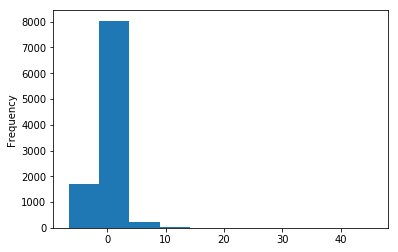

In [560]:
score.plot.hist()

(array([2.399e+03, 1.150e+03, 6.410e+02, 3.950e+02, 1.820e+02, 6.200e+01,
        1.800e+01, 8.000e+00, 2.000e+00, 2.000e+00]),
 array([0.00579111, 0.38915997, 0.77252883, 1.1558977 , 1.53926656,
        1.92263543, 2.30600429, 2.68937315, 3.07274202, 3.45611088,
        3.83947975]),
 <a list of 10 Patch objects>)

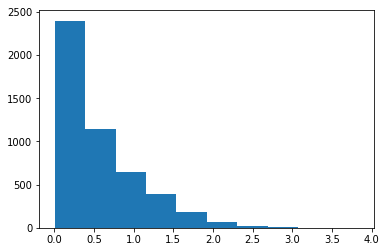

In [561]:
plt.hist(np.log1p(score[score>0]))

(array([3.000e+00, 1.000e+00, 6.000e+00, 7.820e+02, 5.030e+02, 5.410e+02,
        5.100e+02, 4.240e+02, 3.020e+02, 2.051e+03]),
 array([-2.0296327 , -1.82782149, -1.62601028, -1.42419906, -1.22238785,
        -1.02057663, -0.81876542, -0.6169542 , -0.41514299, -0.21333177,
        -0.01152056]),
 <a list of 10 Patch objects>)

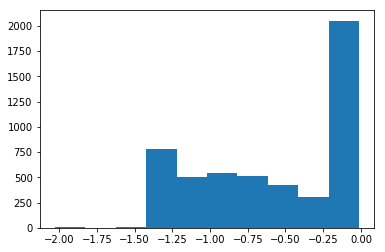

In [562]:
plt.hist(-np.log1p(np.abs(score[score<=0])))

In [563]:
pd.get_dummies(toys['Topic']).head(1)

,banner party birthday foil happy length holographic decoration repeat silver letter plastic cut bright inexpensive lend number atmosphere section room,card deck pokemon booster trading player match sleeve rare tin attax playing pokémon seal play foil team print face picture,combine postage shipment discount offer free figurine pvc cube story bul colourfully paint playful rory water number canal coordination recreate,dice roll black bag opaque game dragon white die color polyhedral spot role math ideal dungeon cup red blue set,game player domino board play chess tile family win question number classic rule word score piece place turn skill chip,miniature doll house handmade finish paint price clay affordable majority ceramic vast exacting inhouse mytinyworld collector philosophy establish real feel,model true original collector adult car intend packaging classix minimum recommend note faithful detailed plastic miniart pocketbond kit cast london,puppet company story animal tale fairy glove entertain imagination translate reputation puppetry enchanted mystical adult excite toys encourage ability life,puzzle piece jigsaw family trefl cardboard build activity skill artist solve castorland way poland ravensburger finish challenge provide different value,wooden train track railway engine bigjigs thomas rail playmobil friend responsibly knight pirate bead piece learn safety brio papo locomotive
0,0,0,0,0,0,0,0,0,1,0


In [564]:
score = score.fillna(0)

In [565]:
X = pd.get_dummies(toys['Topic'])

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, score)
model.predict(X)

array([-0.00488281, -0.00488281, -0.00488281, ..., -0.00488281,
       -0.00488281, -0.31945801])

In [566]:
from sklearn.metrics import mean_squared_error as mse

mse(score, model.predict(X))

3.1378497017761533

In [567]:
model.coef_

array([3.38820827e+11, 3.38820827e+11, 3.38820827e+11, 3.38820827e+11,
       3.38820827e+11, 3.38820827e+11, 3.38820827e+11, 3.38820827e+11,
       3.38820827e+11, 3.38820827e+11])

In [568]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(product_description, score)
y_hat = model.predict(product_description)

In [569]:
mse(score, y_hat)

0.2513705937153236

In [570]:
model.coef_

array([  6.06381299,  -0.37858813,  -0.36964915, ..., -16.049308  ,
        -3.63707928,  -5.34976933])

In [571]:
scores = pd.DataFrame({'Score':model.coef_,'What':tfidf_feature_names,'Volume':np.array(product_description.sum(0))[0]})

In [572]:
scores.head(10)

,Score,Volume,What
0,6.063813,0.287175,____________________________________
1,-0.378588,0.254699,___die
2,-0.369649,0.016386,__auipreloadindex
3,-0.138618,0.006145,_aa
4,14.205774,0.410869,_black
5,-0.092412,0.004096,_blank
6,-0.046206,0.002048,_bo
7,-1.663421,0.073736,_cb
8,-0.138618,0.006145,_encoding
9,-0.277237,0.012289,_items


In [573]:
scores['Value'] = np.abs(scores['Score'])

In [574]:
scores['Volume'].head(10)

0    0.287175
1    0.254699
2    0.016386
3    0.006145
4    0.410869
5    0.004096
6    0.002048
7    0.073736
8    0.006145
9    0.012289
Name: Volume, dtype: float64

In [575]:
scores.sort_values(by = 'Value', ascending = False)[0:10]

,Score,Volume,What,Value
6091,139.896107,0.727906,enables,139.896107
6520,103.800134,0.650727,explosive,103.800134
259,-103.739802,1.700850,adorn,103.739802
19566,102.219164,1.924367,traxxas,102.219164
1888,-100.040911,0.401996,biscuit,100.040911
18961,99.465717,0.812238,tense,99.465717
12679,89.537139,0.608791,nerve,89.537139
2149,-89.038083,1.392922,bore,89.038083
7032,-84.521881,0.396391,fixing,84.521881
5834,83.054206,0.064722,ediss,83.054206


In [576]:
scaled = (scores['Volume'] - scores['Volume'].min())/(scores['Volume'].max()-scores['Volume'].min())

In [577]:
scaled.min(), scaled.max()

(0.0, 1.0)

In [578]:
scores['Scaled'] = scaled
scores['Importance'] = scores['Value']*scores['Scaled']
scores = scores.loc[scores['Importance']>0.5]
scores.sort_values(by = 'Importance', ascending = False, inplace = True)

In [579]:
scores['Final'] = scores['Importance']*((scores['Score'] > 0)*1).replace({0:-1})

In [580]:
scores[0:20].style.bar(subset = ['Final'], align = 'mid', color = ['red','green'])

,Score,Volume,What,Value,Scaled,Importance,Final
2868,-73.0824,44.36,case,73.0824,0.253139,18.5,-18.5
3413,53.1628,27.4122,clear,53.1628,0.156423,8.31589,8.31589
11097,-36.1479,35.9758,love,36.1479,0.205293,7.42092,-7.42092
16686,-29.678,43.7679,sell,29.678,0.24976,7.41239,-7.41239
14712,37.7234,33.6323,produce,37.7234,0.191919,7.23984,7.23984
2839,43.4077,25.4137,carry,43.4077,0.145018,6.29489,6.29489
14464,23.5702,45.5528,postage,23.5702,0.259946,6.12697,6.12697
18490,31.2463,31.7716,supply,31.2463,0.181301,5.66497,5.66497
3690,-8.7943,108.614,combine,8.7943,0.61982,5.45088,-5.45088
16916,29.8237,30.9966,ship,29.8237,0.176878,5.27516,5.27516
